In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 500)


from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('../../documents/data/nyc_restaurants.csv')

In [3]:
data_names = ['id', 'name', 'boro','bldg_num','street','zipcode','phone','cuisine','inspect_date','action','violation_code','violation_desc','critical_flag','score','grade','grade_date','record_date','inspect_type']
data.columns = data_names

data.columns

Index(['id', 'name', 'boro', 'bldg_num', 'street', 'zipcode', 'phone',
       'cuisine', 'inspect_date', 'action', 'violation_code', 'violation_desc',
       'critical_flag', 'score', 'grade', 'grade_date', 'record_date',
       'inspect_type'],
      dtype='object')

In [4]:
data.head()

,id,name,boro,bldg_num,street,zipcode,phone,cuisine,inspect_date,action,violation_code,violation_desc,critical_flag,score,grade,grade_date,record_date,inspect_type
0,50000598,UNCLE TED'S,MANHATTAN,163,BLEECKER STREET,10012.0,2127771395,Chinese,10/03/2016,Violations were cited in the following area(s).,04N,"Filth flies or food/refuse/sewage-associated (FRSA) flies present in facilitys food and/or non-food areas. Filth flies include house flies, little house flies, blow flies, bottle flies and flesh flies. Food/refuse/sewage-associated flies include fruit flies, drain flies and Phorid flies.",Critical,46.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
1,50000786,DUNKIN' DONUTS,BROOKLYN,873,FLATBUSH AVENUE,11226.0,7189400080,Donuts,12/14/2017,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil ware washing operation.,Not Critical,10.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
2,41703747,M2N BUFFET,QUEENS,4012,82 STREET,11373.0,7188032488,American,01/27/2016,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Not Critical,21.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
3,40394258,TOMMASO RESTAURANT,BROOKLYN,1464,86 STREET,11228.0,7182369883,Italian,10/24/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,Critical,27.0,B,10/24/2017,02/06/2019,Cycle Inspection / Re-inspection
4,50059515,STICKY'S FINGER JOINT,MANHATTAN,21,MAIDEN LN,10038.0,9177551770,Chicken,03/08/2018,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment soiled with possible contaminant. Effective hair restraint not worn in an area where food is prepared.,Critical,5.0,A,03/08/2018,02/06/2019,Cycle Inspection / Initial Inspection


In [5]:
#drop duplicates
data.drop_duplicates()

,id,name,boro,bldg_num,street,zipcode,phone,cuisine,inspect_date,action,violation_code,violation_desc,critical_flag,score,grade,grade_date,record_date,inspect_type
0,50000598,UNCLE TED'S,MANHATTAN,163,BLEECKER STREET,10012.0,2127771395,Chinese,10/03/2016,Violations were cited in the following area(s).,04N,"Filth flies or food/refuse/sewage-associated (FRSA) flies present in facilitys food and/or non-food areas. Filth flies include house flies, little house flies, blow flies, bottle flies and flesh flies. Food/refuse/sewage-associated flies include fruit flies, drain flies and Phorid flies.",Critical,46.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
1,50000786,DUNKIN' DONUTS,BROOKLYN,873,FLATBUSH AVENUE,11226.0,7189400080,Donuts,12/14/2017,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil ware washing operation.,Not Critical,10.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
2,41703747,M2N BUFFET,QUEENS,4012,82 STREET,11373.0,7188032488,American,01/27/2016,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Not Critical,21.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
3,40394258,TOMMASO RESTAURANT,BROOKLYN,1464,86 STREET,11228.0,7182369883,Italian,10/24/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,Critical,27.0,B,10/24/2017,02/06/2019,Cycle Inspection / Re-inspection
4,50059515,STICKY'S FINGER JOINT,MANHATTAN,21,MAIDEN LN,10038.0,9177551770,Chicken,03/08/2018,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment soiled with possible contaminant. Effective hair restraint not worn in an area where food is prepared.,Critical,5.0,A,03/08/2018,02/06/2019,Cycle Inspection / Initial Inspection
5,50045661,CHUBBY BURGER CHICKEN & PIZZA,BROOKLYN,2962,FULTON ST,11208.0,7182350300,Chicken,06/28/2018,Establishment re-opened by DOHMH,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Not Critical,2.0,P,06/28/2018,02/06/2019,Cycle Inspection / Reopening Inspection
6,50033875,ARIANA'S,STATEN ISLAND,60,S BRIDGE ST,10309.0,7189678500,Italian,05/21/2016,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,Critical,10.0,A,05/21/2016,02/06/2019,Cycle Inspection / Initial Inspection
7,50073959,SVG CARIBBEAN BAKERY AND RESTAURANT,BROOKLYN,1621,NOSTRAND AVE,11226.0,7186931926,Caribbean,09/26/2018,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly.,Not Critical,9.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
8,50086524,STOP & GO DELI,BRONX,134,WESTCHESTER SQ,10461.0,7187920683,Delicatessen,01/25/2019,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or applicable laws. Prohibited chemical used/stored. Open bait station used.,Not Critical,13.0,A,01/25/2019,02/06/2019,Pre-permit (Operational) / Re-inspection
9,41184697,CHORUS MUSIC STUDIO/ CHORUS KARAOKE LOUNGE BAR,MANHATTAN,25,WEST 32 STREET,10001.0,2129672244,Korean,02/21/2018,Violations were cited in the following area(s).,15F,NaN,Not A

In [6]:
# check
data.shape

(385670, 18)

### Grade Column Value Cleanup

In [7]:
# Drop rows with Nan values in column grade
data.dropna(subset=['grade'],inplace=True)

In [8]:
# check if rows dropped
data.shape

(194784, 18)

In [9]:
# find indexes of rows where grade equals P, Z, G or Not Yet Graded
grade_delete = data[(data['grade'] == 'P') | (data['grade'] == 'Z') | (data['grade'] == 'G') | (data['grade'] == 'Not Yet Graded')].index

In [10]:
# drop those indexes
data.drop(grade_delete, inplace=True)

In [11]:
# check if dropped
data.shape

(187136, 18)

In [12]:
# map values to remaining A, B, C grade values
data['grade_num'] = data.grade.map({'A':1, 'B':2, 'C':3})

In [13]:
# check if values are mapped
data.head()

,id,name,boro,bldg_num,street,zipcode,phone,cuisine,inspect_date,action,violation_code,violation_desc,critical_flag,score,grade,grade_date,record_date,inspect_type,grade_num
3,40394258,TOMMASO RESTAURANT,BROOKLYN,1464,86 STREET,11228.0,7182369883,Italian,10/24/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,Critical,27.0,B,10/24/2017,02/06/2019,Cycle Inspection / Re-inspection,2
4,50059515,STICKY'S FINGER JOINT,MANHATTAN,21,MAIDEN LN,10038.0,9177551770,Chicken,03/08/2018,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment soiled with possible contaminant. Effective hair restraint not worn in an area where food is prepared.,Critical,5.0,A,03/08/2018,02/06/2019,Cycle Inspection / Initial Inspection,1
6,50033875,ARIANA'S,STATEN ISLAND,60,S BRIDGE ST,10309.0,7189678500,Italian,05/21/2016,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,Critical,10.0,A,05/21/2016,02/06/2019,Cycle Inspection / Initial Inspection,1
8,50086524,STOP & GO DELI,BRONX,134,WESTCHESTER SQ,10461.0,7187920683,Delicatessen,01/25/2019,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or applicable laws. Prohibited chemical used/stored. Open bait station used.,Not Critical,13.0,A,01/25/2019,02/06/2019,Pre-permit (Operational) / Re-inspection,1
11,41387635,ANGELOS DELI RESTAURANT,QUEENS,5000,GRAND AVENUE,11378.0,7183864423,Mexican,10/02/2018,Violations were cited in the following area(s).,09C,Food contact surface not properly maintained.,Not Critical,12.0,A,10/02/2018,02/06/2019,Cycle Inspection / Re-inspection,1


### Cuisine Value Cleanup

In [14]:
# number of restaurants
data.id.nunique()

25249

In [15]:
# Top cuisines by number of restaurants
data.groupby('cuisine')['id'].nunique().sort_values(ascending=False).head(10)

cuisine
American                                                            5824
Chinese                                                             2368
CafÃ©/Coffee/Tea                                                    1697
Pizza                                                               1174
Italian                                                             982 
Mexican                                                             907 
Japanese                                                            856 
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    806 
Bakery                                                              722 
Caribbean                                                           677 
Name: id, dtype: int64

In [16]:
data[data['cuisine']=='Pizza']

,id,name,boro,bldg_num,street,zipcode,phone,cuisine,inspect_date,action,violation_code,violation_desc,critical_flag,score,grade,grade_date,record_date,inspect_type,grade_num
14,50067183,DAISY PIZZA,QUEENS,2817,36TH AVE,11106.0,7187867861,Pizza,11/29/2017,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Not Critical,3.0,A,11/29/2017,02/06/2019,Cycle Inspection / Re-inspection,1
47,41436770,PIZZA HAVEN,MANHATTAN,4942,BROADWAY,10034.0,2125693720,Pizza,09/22/2017,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or applicable laws. Prohibited chemical used/stored. Open bait station used.,Not Critical,12.0,A,09/22/2017,02/06/2019,Cycle Inspection / Re-inspection,1
48,50012265,PIZZA MOTO,BROOKLYN,338,HAMILTON AVE,11231.0,7739317900,Pizza,05/18/2018,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,Critical,12.0,A,05/18/2018,02/06/2019,Cycle Inspection / Initial Inspection,1
91,41701184,LITTLE CAESARS,BRONX,1054,SOUTHERN BOULEVARD,10459.0,9177927490,Pizza,04/09/2018,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Not Critical,4.0,A,04/09/2018,02/06/2019,Cycle Inspection / Initial Inspection,1
255,50043795,NEW FRESH PIZZA,BROOKLYN,2703,CHURCH AVE,11226.0,3474446552,Pizza,07/18/2018,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",Critical,5.0,A,07/18/2018,02/06/2019,Cycle Inspection / Re-inspection,1
300,40980377,LITTLE TONINO'S PIZZA & CAFE,BROOKLYN,424,GREENWOOD AVE,11218.0,7184387088,Pizza,07/18/2017,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Not Critical,7.0,A,07/18/2017,02/06/2019,Cycle Inspection / Initial Inspection,1
312,50007121,SLICE OF BROOKLYN INC.,BROOKLYN,849,4TH AVE,11232.0,7184992121,Pizza,05/23/2016,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or applicable laws. Prohibited chemical used/stored. Open bait station used.,Not Critical,11.0,A,05/23/2016,02/06/2019,Cycle Inspection / Initial Inspection,1
322,50018322,PAPA JOHN'S,QUEENS,14714,45TH AVE,11355.0,7184637272,Pizza,10/31/2015,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",Critical,7.0,A,10/31/2015,02/06/2019,Cycle Inspection / Re-inspection,1
330,40388639,GLENDALE PIZZA,QUEENS,6827,MYRTLE AVENUE,11385.0,7183668313,Pizza,09/05/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facility's food and/or non-food areas.,Critical,12.0,A,09/05/2018,02/06/2019,Cycle Inspection / Initial Inspection,1
361,41177037,QUEEN'S PIZZA,QUEENS,11614,QUEENS BOULEVARD,11375.0,7185445800,Pizza,06/30/2015,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not 

In [18]:
data.cuisine.replace(['CafÃ©/Coffee/Tea',"Latin (Cuban, Dominican, Puerto Rican, South & Central American)"], 
                     ['Cafe','Latin'], inplace=True)


In [19]:
# Create new column establishing top ten cuisines and other
top_ten = ['American','Chinese', 'Cafe','Pizza','Italian','Mexican','Japanese','Latin','Bakery', 'Caribbean']

data['cuisine_edit'] = np.where(data['cuisine'].isin(top_ten),data['cuisine'],'Other')
data[data['cuisine']=='Latin']

,id,name,boro,bldg_num,street,zipcode,phone,cuisine,inspect_date,action,violation_code,violation_desc,critical_flag,score,grade,grade_date,record_date,inspect_type,grade_num,cuisine_edit
97,41302692,ARMANDO'S POLLO RICO RESTAURANT,QUEENS,11002,JAMAICA AVENUE,11418.0,7184418441,Latin,04/26/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly.,Not Critical,33.0,C,04/26/2017,02/06/2019,Cycle Inspection / Re-inspection,3,Latin
186,41277461,ANTONIO'S RESTAURANT,BRONX,211,EAST 167 STREET,10456.0,7189923367,Latin,09/14/2018,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",Critical,42.0,C,09/14/2018,02/06/2019,Cycle Inspection / Re-inspection,3,Latin
230,41466567,BAR VERDE,MANHATTAN,65,2 AVENUE,10003.0,2127776965,Latin,08/11/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly.,Not Critical,9.0,A,08/11/2017,02/06/2019,Cycle Inspection / Initial Inspection,1,Latin
316,50035684,VSPOT ORGANIC,MANHATTAN,12,SAINT MARKS PL,10003.0,2122543693,Latin,03/16/2016,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizing solution.,Critical,23.0,B,03/16/2016,02/06/2019,Cycle Inspection / Re-inspection,2,Latin
354,50075382,ANGEL'S CAFE,BRONX,743,E 187TH ST,10458.0,7183298828,Latin,07/02/2018,Establishment re-opened by DOHMH,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Not Critical,2.0,C,07/02/2018,02/06/2019,Pre-permit (Operational) / Reopening Inspection,3,Latin
413,41583191,QUEZADA RESTAURANT,BROOKLYN,1212,FLATBUSH AVENUE,11226.0,7182820622,Latin,03/06/2018,Establishment re-opened by DOHMH,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Not Critical,2.0,C,03/06/2018,02/06/2019,Cycle Inspection / Reopening Inspection,3,Latin
489,41183237,809 GRILL & BAR RESTAURANT,MANHATTAN,112,DYCKMAN STREET,10040.0,2123043800,Latin,11/30/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly.,Not Critical,13.0,A,11/30/2017,02/06/2019,Cycle Inspection / Re-inspection,1,Latin
583,50003350,3-J RESTAURANT AND PIZZA,BRONX,554A,PROSPECT AVE,10455.0,3473461381,Latin,07/03/2018,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.,Not Critical,33.0,C,07/03/2018,02/06/2019,Cycle Inspection / Re-inspection,3,Latin
612,41648187,EL NUEVO SANDY RESTAURANT,MANHATTAN,2261,2 AVENUE,10035.0,2123488654,Latin,06/13/2016,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly.,Not Critical,30.0,C,06/13/2016,02/06/2019,Cyc

In [20]:
# dummify column cuisine_edit

cuisine_dummies = pd.get_dummies(data.cuisine_edit, prefix='cuisine', drop_first=True)

cuisine_dummies

,cuisine_Bakery,cuisine_Cafe,cuisine_Caribbean,cuisine_Chinese,cuisine_Italian,cuisine_Japanese,cuisine_Latin,cuisine_Mexican,cuisine_Other,cuisine_Pizza
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0
11,0,0,0,0,0,0,0,1,0,0
12,0,0,0,0,0,0,0,0,1,0
14,0,0,0,0,0,0,0,0,0,1
17,0,0,0,0,0,0,0,1,0,0
18,0,1,0,0,0,0,0,0,0,0
20,0,0,0,1,0,0,0,0,0,0


In [21]:
data['action'].value_counts().sort_values(ascending=False).head(10)

Violations were cited in the following area(s).                                                                                        185706
Establishment re-opened by DOHMH                                                                                                       748   
No violations were recorded at the time of this inspection.                                                                            677   
Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.    5     
Name: action, dtype: int64

### Action Cleanup

In [22]:
# simplify action wording
data.action.replace(['Violations were cited in the following area(s).',
       'No violations were recorded at the time of this inspection.',
       'Establishment re-opened by DOHMH',
       'Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.'],
                   ['Violations cited.','No violations.','Re-opened by DOHMH','Closed by DOHMH. Violations cited.'],
                   inplace=True)
# check
data.head()

,id,name,boro,bldg_num,street,zipcode,phone,cuisine,inspect_date,action,violation_code,violation_desc,critical_flag,score,grade,grade_date,record_date,inspect_type,grade_num,cuisine_edit
3,40394258,TOMMASO RESTAURANT,BROOKLYN,1464,86 STREET,11228.0,7182369883,Italian,10/24/2017,Violations cited.,02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,Critical,27.0,B,10/24/2017,02/06/2019,Cycle Inspection / Re-inspection,2,Italian
4,50059515,STICKY'S FINGER JOINT,MANHATTAN,21,MAIDEN LN,10038.0,9177551770,Chicken,03/08/2018,Violations cited.,06A,Personal cleanliness inadequate. Outer garment soiled with possible contaminant. Effective hair restraint not worn in an area where food is prepared.,Critical,5.0,A,03/08/2018,02/06/2019,Cycle Inspection / Initial Inspection,1,Other
6,50033875,ARIANA'S,STATEN ISLAND,60,S BRIDGE ST,10309.0,7189678500,Italian,05/21/2016,Violations cited.,02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,Critical,10.0,A,05/21/2016,02/06/2019,Cycle Inspection / Initial Inspection,1,Italian
8,50086524,STOP & GO DELI,BRONX,134,WESTCHESTER SQ,10461.0,7187920683,Delicatessen,01/25/2019,Violations cited.,08C,Pesticide use not in accordance with label or applicable laws. Prohibited chemical used/stored. Open bait station used.,Not Critical,13.0,A,01/25/2019,02/06/2019,Pre-permit (Operational) / Re-inspection,1,Other
11,41387635,ANGELOS DELI RESTAURANT,QUEENS,5000,GRAND AVENUE,11378.0,7183864423,Mexican,10/02/2018,Violations cited.,09C,Food contact surface not properly maintained.,Not Critical,12.0,A,10/02/2018,02/06/2019,Cycle Inspection / Re-inspection,1,Mexican


In [23]:
# dummify action choices
action_dummies = pd.get_dummies(data.action, prefix='action', drop_first=True)

action_dummies

,action_No violations.,action_Re-opened by DOHMH,action_Violations cited.
3,0,0,1
4,0,0,1
6,0,0,1
8,0,0,1
11,0,0,1
12,0,0,1
14,0,0,1
17,0,0,1
18,0,0,1
20,0,0,1


### Borough Cleanup

In [24]:
data.groupby('boro')['id'].nunique().sort_values(ascending=False)

boro
MANHATTAN        10102
BROOKLYN         6264 
QUEENS           5678 
BRONX            2283 
STATEN ISLAND    917  
Missing          5    
Name: id, dtype: int64

In [25]:
# find missing boroughs' zipcodes
data[data['boro']=='Missing']['zipcode'].unique()

array([11249., 10281., 10168.])

In [26]:
#replace Missing boroughs with appropriate values

data.loc[(data['boro']=='Missing') & 
         (data['zipcode']==11249.0), 'boro'] = 'BROOKLYN'

data.loc[(data['boro']=='Missing') & 
         (data['zipcode']==10281.0), 'boro'] = 'MANHATTAN'

data.loc[(data['boro']=='Missing') & 
         (data['zipcode']==10168.0), 'boro'] = 'MANHATTAN'

#check
data[data['boro']=='Missing']

,id,name,boro,bldg_num,street,zipcode,phone,cuisine,inspect_date,action,violation_code,violation_desc,critical_flag,score,grade,grade_date,record_date,inspect_type,grade_num,cuisine_edit


In [27]:
# dummify boro

boro_dummies = pd.get_dummies(data.boro, prefix='boro', drop_first=True)
boro_dummies

,boro_BROOKLYN,boro_MANHATTAN,boro_QUEENS,boro_STATEN ISLAND
3,1,0,0,0
4,0,1,0,0
6,0,0,0,1
8,0,0,0,0
11,0,0,1,0
12,0,0,0,0
14,0,0,1,0
17,1,0,0,0
18,0,1,0,0
20,0,0,1,0


### Critical Flag Cleanup

In [28]:
data.violation_code.unique()

array(['02G', '06A', '08C', '09C', '04H', '10F', '04L', '04M', '10C',
       '04J', '04N', '10B', '04A', '10H', '05D', '02H', '10D', '06E',
       '02B', '06D', '06F', '08A', '10I', '06C', '04E', '04C', '06B',
       '10J', '09B', '06G', '04K', nan, '08B', '10E', '04F', '02I', '09A',
       '05F', '22F', '02C', '10A', '22G', '02A', '02F', '03B', '05H',
       '03A', '04O', '05C', '02D', '04D', '03G', '03C', '10G', '05E',
       '03E', '07A', '05B', '03D', '04B', '19A', '05A', '02E', '06I',
       '17A', '04G', '04I'], dtype=object)

In [29]:
data.critical_flag.value_counts()

Critical          96078
Not Critical      89984
Not Applicable    1074 
Name: critical_flag, dtype: int64

In [30]:
data[data['critical_flag']=='Not Applicable']

,id,name,boro,bldg_num,street,zipcode,phone,cuisine,inspect_date,action,violation_code,violation_desc,critical_flag,score,grade,grade_date,record_date,inspect_type,grade_num,cuisine_edit
344,50047527,CREME & SUGAR,QUEENS,5842A,CATALPA AVE,11385.0,3479276171,"Ice Cream, Gelato, Yogurt, Ices",05/23/2016,No violations.,NaN,NaN,Not Applicable,0.0,A,05/23/2016,02/06/2019,Cycle Inspection / Initial Inspection,1,Other
674,50066651,Nagoya Fusion Sushi,BROOKLYN,1907,KINGS HWY,11229.0,7183363688,Asian,05/17/2018,No violations.,NaN,NaN,Not Applicable,0.0,A,05/17/2018,02/06/2019,Cycle Inspection / Re-inspection,1,Other
708,40861141,CASA PROMESA,BRONX,308,EAST 175 STREET,10457.0,7189607658,American,08/26/2015,No violations.,NaN,NaN,Not Applicable,0.0,A,08/26/2015,02/06/2019,Cycle Inspection / Initial Inspection,1,American
756,50002203,SUBWAY,MANHATTAN,1518,AMSTERDAM AVE,10031.0,3475319900,Sandwiches/Salads/Mixed Buffet,03/15/2016,No violations.,NaN,NaN,Not Applicable,0.0,A,03/15/2016,02/06/2019,Cycle Inspection / Re-inspection,1,Other
792,50001496,MORGAN STANLEY CONFERENCE CENTER,MANHATTAN,1585,BROADWAY,10036.0,2127617419,American,12/11/2015,No violations.,NaN,NaN,Not Applicable,0.0,A,12/11/2015,02/06/2019,Cycle Inspection / Initial Inspection,1,American
894,50057978,Underwest Donuts,MANHATTAN,2,PENN PLZ,10121.0,2123172359,Donuts,01/06/2017,No violations.,NaN,NaN,Not Applicable,0.0,A,01/06/2017,02/06/2019,Pre-permit (Operational) / Initial Inspection,1,Other
1656,50056650,SUBSTANCE ORGANIC JUICERY,MANHATTAN,2268,BROADWAY,10024.0,2124966000,"Juice, Smoothies, Fruit Salads",12/20/2016,Violations cited.,22F,NaN,Not Applicable,4.0,A,12/20/2016,02/06/2019,Pre-permit (Operational) / Initial Inspection,1,Other
1791,41690495,STARBUCKS,MANHATTAN,219,1 AVENUE,10003.0,2122540358,Cafe,10/18/2017,Re-opened by DOHMH,NaN,NaN,Not Applicable,0.0,C,10/18/2017,02/06/2019,Cycle Inspection / Reopening Inspection,3,Cafe
2389,41550697,DORIAN GRAY,MANHATTAN,205,EAST 4 STREET,10009.0,2129790900,American,04/25/2018,No violations.,NaN,NaN,Not Applicable,0.0,A,04/25/2018,02/06/2019,Cycle Inspection / Re-inspection,1,American
2398,41180600,KENNEDY FRIED CHICKEN,QUEENS,3561,JUNCTION BOULEVARD,11368.0,7187799337,American,02/04/2019,Violations cited.,22G,NaN,Not Applicable,7.0,A,02/04/2019,02/06/2019,Cycle Inspection / Re-inspection,1,American


In [31]:
# make critical_flag binary
data['is_critical'] = data.critical_flag.map({'Critical':1, 'Not Critical':0, 'Not Applicable':0})

#check
data.head()

,id,name,boro,bldg_num,street,zipcode,phone,cuisine,inspect_date,action,violation_code,violation_desc,critical_flag,score,grade,grade_date,record_date,inspect_type,grade_num,cuisine_edit,is_critical
3,40394258,TOMMASO RESTAURANT,BROOKLYN,1464,86 STREET,11228.0,7182369883,Italian,10/24/2017,Violations cited.,02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,Critical,27.0,B,10/24/2017,02/06/2019,Cycle Inspection / Re-inspection,2,Italian,1
4,50059515,STICKY'S FINGER JOINT,MANHATTAN,21,MAIDEN LN,10038.0,9177551770,Chicken,03/08/2018,Violations cited.,06A,Personal cleanliness inadequate. Outer garment soiled with possible contaminant. Effective hair restraint not worn in an area where food is prepared.,Critical,5.0,A,03/08/2018,02/06/2019,Cycle Inspection / Initial Inspection,1,Other,1
6,50033875,ARIANA'S,STATEN ISLAND,60,S BRIDGE ST,10309.0,7189678500,Italian,05/21/2016,Violations cited.,02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,Critical,10.0,A,05/21/2016,02/06/2019,Cycle Inspection / Initial Inspection,1,Italian,1
8,50086524,STOP & GO DELI,BRONX,134,WESTCHESTER SQ,10461.0,7187920683,Delicatessen,01/25/2019,Violations cited.,08C,Pesticide use not in accordance with label or applicable laws. Prohibited chemical used/stored. Open bait station used.,Not Critical,13.0,A,01/25/2019,02/06/2019,Pre-permit (Operational) / Re-inspection,1,Other,0
11,41387635,ANGELOS DELI RESTAURANT,QUEENS,5000,GRAND AVENUE,11378.0,7183864423,Mexican,10/02/2018,Violations cited.,09C,Food contact surface not properly maintained.,Not Critical,12.0,A,10/02/2018,02/06/2019,Cycle Inspection / Re-inspection,1,Mexican,0


In [101]:
vcodes = data.violation_code.unique()
vcodes

array(['02G', '06A', '08C', '09C', '04H', '10F', '04L', '04M', '10C',
       '04J', '04N', '10B', '04A', '10H', '05D', '02H', '10D', '06E',
       '02B', '06D', '06F', '08A', '10I', '06C', '04E', '04C', '06B',
       '10J', '09B', '06G', '04K', nan, '08B', '10E', '04F', '02I', '09A',
       '05F', '22F', '02C', '10A', '22G', '02A', '02F', '03B', '05H',
       '03A', '04O', '05C', '02D', '04D', '03G', '03C', '10G', '05E',
       '03E', '07A', '05B', '03D', '04B', '19A', '05A', '02E', '06I',
       '17A', '04G', '04I'], dtype=object)

In [97]:
data.violation_code.nunique()

66

In [110]:
data.groupby('id')['violation_code'].value_counts()

id        violation_code
30075445  10F               2
          04L               1
          06D               1
          08A               1
          08C               1
30112340  10B               3
          08A               2
          04A               1
          04H               1
          04L               1
          04N               1
          06B               1
          08C               1
          10E               1
          10F               1
30191841  10F               3
          04H               1
          04L               1
          06C               1
          06D               1
          08A               1
          10B               1
40356018  10F               3
          06D               2
          06C               1
          10B               1
40356151  04L               1
          06C               1
          08A               1
          10F               1
                           ..
50086953  10B               1
50086994  10F  

In [105]:
for c in range(66):
    data[vcodes[c]] = data['violation_code']['id'].

SyntaxError: invalid syntax (<ipython-input-105-cc52bf4ce5a8>, line 2)

### Add Dummies to the main dataframe

In [32]:
data_dummies = pd.concat([data, boro_dummies, action_dummies, cuisine_dummies], axis=1)

data_dummies.head()

,id,name,boro,bldg_num,street,zipcode,phone,cuisine,inspect_date,action,violation_code,violation_desc,critical_flag,score,grade,grade_date,record_date,inspect_type,grade_num,cuisine_edit,is_critical,boro_BROOKLYN,boro_MANHATTAN,boro_QUEENS,boro_STATEN ISLAND,action_No violations.,action_Re-opened by DOHMH,action_Violations cited.,cuisine_Bakery,cuisine_Cafe,cuisine_Caribbean,cuisine_Chinese,cuisine_Italian,cuisine_Japanese,cuisine_Latin,cuisine_Mexican,cuisine_Other,cuisine_Pizza
3,40394258,TOMMASO RESTAURANT,BROOKLYN,1464,86 STREET,11228.0,7182369883,Italian,10/24/2017,Violations cited.,02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,Critical,27.0,B,10/24/2017,02/06/2019,Cycle Inspection / Re-inspection,2,Italian,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,50059515,STICKY'S FINGER JOINT,MANHATTAN,21,MAIDEN LN,10038.0,9177551770,Chicken,03/08/2018,Violations cited.,06A,Personal cleanliness inadequate. Outer garment soiled with possible contaminant. Effective hair restraint not worn in an area where food is prepared.,Critical,5.0,A,03/08/2018,02/06/2019,Cycle Inspection / Initial Inspection,1,Other,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6,50033875,ARIANA'S,STATEN ISLAND,60,S BRIDGE ST,10309.0,7189678500,Italian,05/21/2016,Violations cited.,02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,Critical,10.0,A,05/21/2016,02/06/2019,Cycle Inspection / Initial Inspection,1,Italian,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
8,50086524,STOP & GO DELI,BRONX,134,WESTCHESTER SQ,10461.0,7187920683,Delicatessen,01/25/2019,Violations cited.,08C,Pesticide use not in accordance with label or applicable laws. Prohibited chemical used/stored. Open bait station used.,Not Critical,13.0,A,01/25/2019,02/06/2019,Pre-permit (Operational) / Re-inspection,1,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
11,41387635,ANGELOS DELI RESTAURANT,QUEENS,5000,GRAND AVENUE,11378.0,7183864423,Mexican,10/02/2018,Violations cited.,09C,Food contact surface not properly maintained.,Not Critical,12.0,A,10/02/2018,02/06/2019,Cycle Inspection / Re-inspection,1,Mexican,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [41]:
data_dummies.shape

(187136, 38)

In [33]:
data_dummies.columns

Index(['id', 'name', 'boro', 'bldg_num', 'street', 'zipcode', 'phone',
       'cuisine', 'inspect_date', 'action', 'violation_code', 'violation_desc',
       'critical_flag', 'score', 'grade', 'grade_date', 'record_date',
       'inspect_type', 'grade_num', 'cuisine_edit', 'is_critical',
       'boro_BROOKLYN', 'boro_MANHATTAN', 'boro_QUEENS', 'boro_STATEN ISLAND',
       'action_No violations.', 'action_Re-opened by DOHMH',
       'action_Violations cited.', 'cuisine_Bakery', 'cuisine_Cafe',
       'cuisine_Caribbean', 'cuisine_Chinese', 'cuisine_Italian',
       'cuisine_Japanese', 'cuisine_Latin', 'cuisine_Mexican', 'cuisine_Other',
       'cuisine_Pizza'],
      dtype='object')

### Modeling Process

In [89]:
#create feature matrix

data_cols = [is_critical','boro_BROOKLYN','boro_MANHATTAN','boro_QUEENS', 'boro_STATEN ISLAND', 'action_No violations.', 'action_Re-opened by DOHMH', 'action_Violations cited.', 'cuisine_Bakery', 'cuisine_Cafe', 'cuisine_Caribbean', 'cuisine_Chinese', 'cuisine_Italian', 'cuisine_Japanese', 'cuisine_Latin', 'cuisine_Mexican', 'cuisine_Other', 'cuisine_Pizza']

eat = data_dummies
# used data_dummies.head(5000) for KNN attempt 

X = eat[data_cols]
y = eat['grade_num']

In [82]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)


In [83]:
#standardize X_train and X_test

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) #overwrite
X_test = scaler.transform(X_test)

C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


### KNN Attempt - Only used 5000 lines of data to test because it was taking too long

In [70]:
# KFolds Cross validation
# fit knn classification model

kf = KFold(n_splits=5, shuffle=True)

k_range = range(1,21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    cv_score = np.mean(cross_val_score(knn, X_train, y_train, cv = kf))
    scores.append([k, cv_score])

In [71]:
# check scores
scores

[[1, 0.9776],
 [2, 0.9575999999999999],
 [3, 0.9634666666666668],
 [4, 0.9472000000000002],
 [5, 0.9493333333333334],
 [6, 0.9359999999999999],
 [7, 0.9341333333333333],
 [8, 0.9242666666666667],
 [9, 0.9290666666666667],
 [10, 0.9181333333333332],
 [11, 0.9173333333333333],
 [12, 0.9103999999999999],
 [13, 0.9077333333333334],
 [14, 0.9029333333333331],
 [15, 0.9032],
 [16, 0.8992000000000001],
 [17, 0.8970666666666667],
 [18, 0.8959999999999999],
 [19, 0.8933333333333333],
 [20, 0.8893333333333334]]

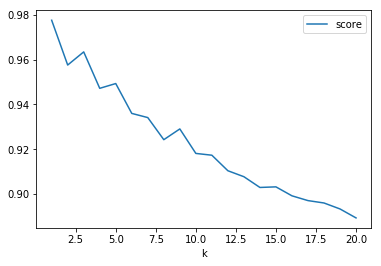

In [72]:
# plot to find best k

model_data = pd.DataFrame(scores, columns=['k','score'])
model_data.plot.line(x ='k',y ='score')

In [ ]:
#fit model with best k
knn = KNeighborsClassification(n_neighbors =)
knn.fit(X_train, y_train)

In [ ]:
#find accuracy score and testing error
y_pred = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test,y_pred)
testing_error = 1 - testing_accuracy

testing_accuracy

In [ ]:
# baseline
y_train.value_counts()/len(y_train)

### LogReg Attempt

In [84]:
logreg = LogisticRegression(C=1e9, solver='lbfgs', multi_class='auto') 

print(np.mean(cross_val_score(logreg, X_train, y_train, cv=kf))) 

C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.996964771894952


C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [85]:
#fit the data
logreg.fit(X_train,y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [86]:
#train data accuracy score
logreg.score(X_train,y_train)

0.9973067715458276

In [87]:
#test data accuracy score
logreg.score(X_test,y_test)

0.9969647742818057

In [88]:
# compare with baseline
y_train.value_counts() / len(y_train)

1    0.824983
2    0.132866
3    0.042151
Name: grade_num, dtype: float64

#### Conclusion:
Training data and testing data accuracy scores are very comparable. In addition, both scores are better than the baseline, suggesting that the model is pretty good. 